In [264]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
import numpy as np

In [266]:
# 1. Carregar o dataset MNIST

data_train, data_test = tf.keras.datasets.mnist.load_data()

X = 0
Y = 1

In [267]:
print(data_train[X].shape)
print(data_train[Y].shape)
print(data_test[X].shape)
print(data_test[Y].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [270]:
data_train[X][0].shape

(28, 28)

In [272]:
data_train[Y][0]

5

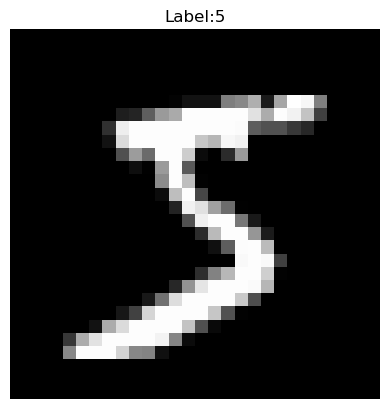

In [274]:
# Visualizar a primeira imagem do dataset de treinamento

plt.imshow(data_train[X][0], cmap='gray')
plt.title(f'Label:{data_train[Y][0]}')
plt.axis('off')
plt.show()

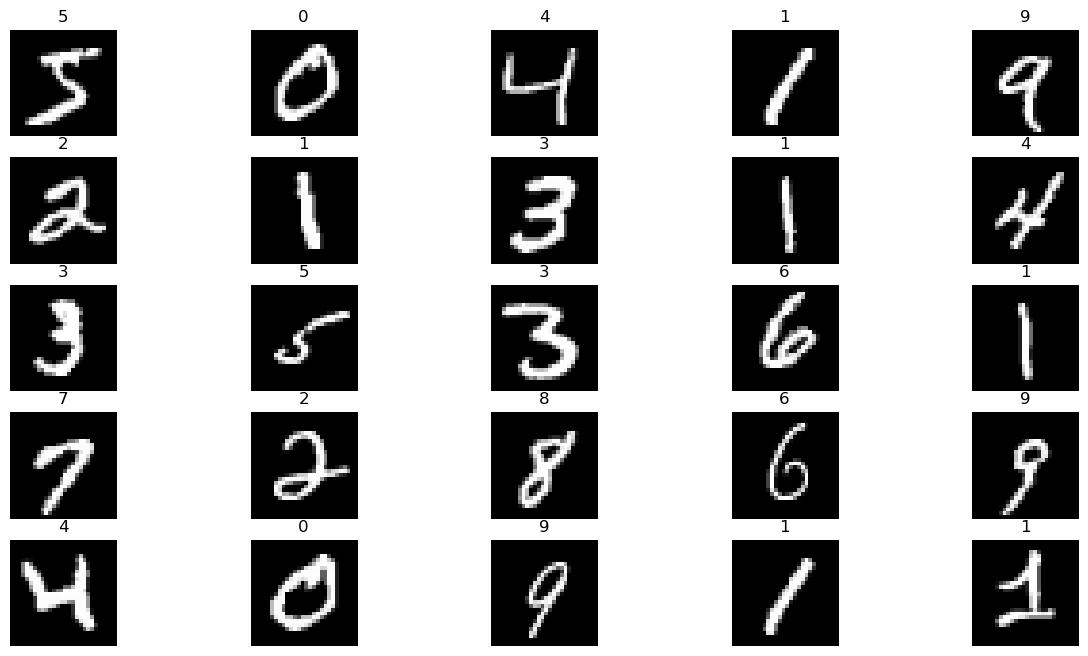

In [276]:
# Visualizar todas as imagens 

plt.figure(figsize=(15,8))

for i, (x, y) in enumerate(zip(data_train[X], data_train[Y]))  :
    if i == 25: break
        
    fig = plt.subplot(5,5, i+1)
    plt.imshow(x, cmap='grey')
    plt.title(y)
    plt.axis('off')

plt.show()
    

In [277]:
# 2. Normalizar os dados (converter os valores dos pixels para o intervalo [0, 1])

def normalization(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255.0
    return images, labels

In [280]:
# Criar um dataset TensorFlow com os dados de treinamento

train_dataset = tf.data.Dataset.from_tensor_slices(data_train)
test_dataset = tf.data.Dataset.from_tensor_slices(data_test)

train_dataset = train_dataset.map(normalization)
test_dataset = test_dataset.map(normalization)

In [282]:
# 5. Definir o tamanho do lote

TAMANHO_LOTE = 32

In [292]:
# 6. Preparar os dados: embaralhar e fazer o batching

train_dataset = train_dataset.shuffle(60000).batch(TAMANHO_LOTE)
test_dataset = test_dataset.batch(TAMANHO_LOTE)

In [286]:
# 7. Verificar as formas das imagens e rótulos
for img, label in train_dataset.take(1):
    print("Formato das imagens:", img.shape)  # Esperado: (32, 28, 28, 1)
    print("Formato dos rótulos:", label.shape)  # Esperado: (32,)

Formato das imagens: (32, 28, 28)
Formato dos rótulos: (32,)


In [288]:
# 8. Definir o modelo
modelo = tf.keras.Sequential([
    # Camada de entrada (784 dados de entrada, imagens 28x28 em escala de cinza)
    tf.keras.layers.Input(shape=(28, 28)),  # O 1 (escala de cinza) é implícito para imagens em escala de cinza

    # Camada oculta (Dense layer com 128 neurônios e ativação ReLU)
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),

    # Camada de saída (10 neurônios, uma para cada dígito, com função de ativação softmax)
    tf.keras.layers.Dense(10, activation='softmax')
]) 

In [290]:
# 9. Compilar o modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [228]:
# 10. Treinamento do modelo
treinamento = modelo.fit(train_dataset, da)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 10)

In [230]:
# 11. Avaliar o modelo no conjunto de teste
resultado = modelo.evaluate(data_test)
print("\nResultado final no conjunto de teste:", resultado)

ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 10)

In [193]:
modelo.predict(da)

NameError: name 'da' is not defined